<a href="https://colab.research.google.com/github/DuplamenteH/Machine-Learning/blob/master/Projeto1_NS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carregando dados e ajustando os DataFrames

In [26]:
import pandas as pd 
uri = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
renomear = {
    'movieId': 'filmesId',
    'title'  : 'titulo',
    'genres' : 'genero'
}

filmes = filmes.rename(columns=renomear)
filmes.head()

,filmesId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
generos = filmes.genero.str.get_dummies(sep='|')

In [29]:
generos.head()


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
dados_filmes = pd.concat([filmes,generos],axis=1)
dados_filmes.head()

,filmesId,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Escalonando dados

In [0]:
from sklearn.preprocessing import  StandardScaler 
scaler = StandardScaler()

In [32]:
generos_Escalados = scaler.fit_transform(generos)

generos_Escalados.shape

(9742, 20)

#Agrupando os dados

In [0]:
from sklearn.cluster import KMeans as KM
modelo = KM(n_clusters=3) 

In [34]:
modelo.fit(generos_Escalados)
print('Grupos {}'.format(modelo.labels_))

Grupos [2 2 0 ... 0 2 0]


In [35]:
print(generos.columns)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')


In [36]:
print(modelo.cluster_centers_)

[[ 0.04030772 -0.31751412 -0.21590944 -0.25227359 -0.27045122  0.25801706
  -0.17975763  0.14480917  0.20158146 -0.14848199 -0.07658311 -0.27663377
  -0.11336962  0.02875527 -0.18544487  0.22594932 -0.26100198 -0.47076514
   0.10025651  0.04209063]
 [-0.05917995  0.62380291  0.14079921 -0.2325662  -0.26780679 -0.57099333
   0.44695314 -0.21588483 -0.20331388  0.01723742  0.17780699  0.62174866
   0.15387243 -0.17743113  0.40007824 -0.34990123  0.46540808  1.05802301
  -0.14021594 -0.05505026]
 [-0.05917995 -0.033867    0.87595856  2.28314655  2.50629282  0.23080566
  -0.31671343 -0.20221857 -0.58987274  0.8548876  -0.09492563 -0.27777491
   0.20634864  0.38671671 -0.13317313 -0.27412553  0.12242791 -0.47256138
  -0.16934298 -0.08320228]]


In [37]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.040308,-0.317514,-0.215909,-0.252274,-0.270451,0.258017,-0.179758,0.144809,0.201581,-0.148482,-0.076583,-0.276634,-0.113370,0.028755,-0.185445,0.225949,-0.261002,-0.470765,0.100257,0.042091
1,-0.059180,0.623803,0.140799,-0.232566,-0.267807,-0.570993,0.446953,-0.215885,-0.203314,0.017237,0.177807,0.621749,0.153872,-0.177431,0.400078,-0.349901,0.465408,1.058023,-0.140216,-0.055050
2,-0.059180,-0.033867,0.875959,2.283147,2.506293,0.230806,-0.316713,-0.202219,-0.589873,0.854888,-0.094926,-0.277775,0.206349,0.386717,-0.133173,-0.274126,0.122428,-0.472561,-0.169343,-0.083202


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f31004bda90>,
      dtype=object)

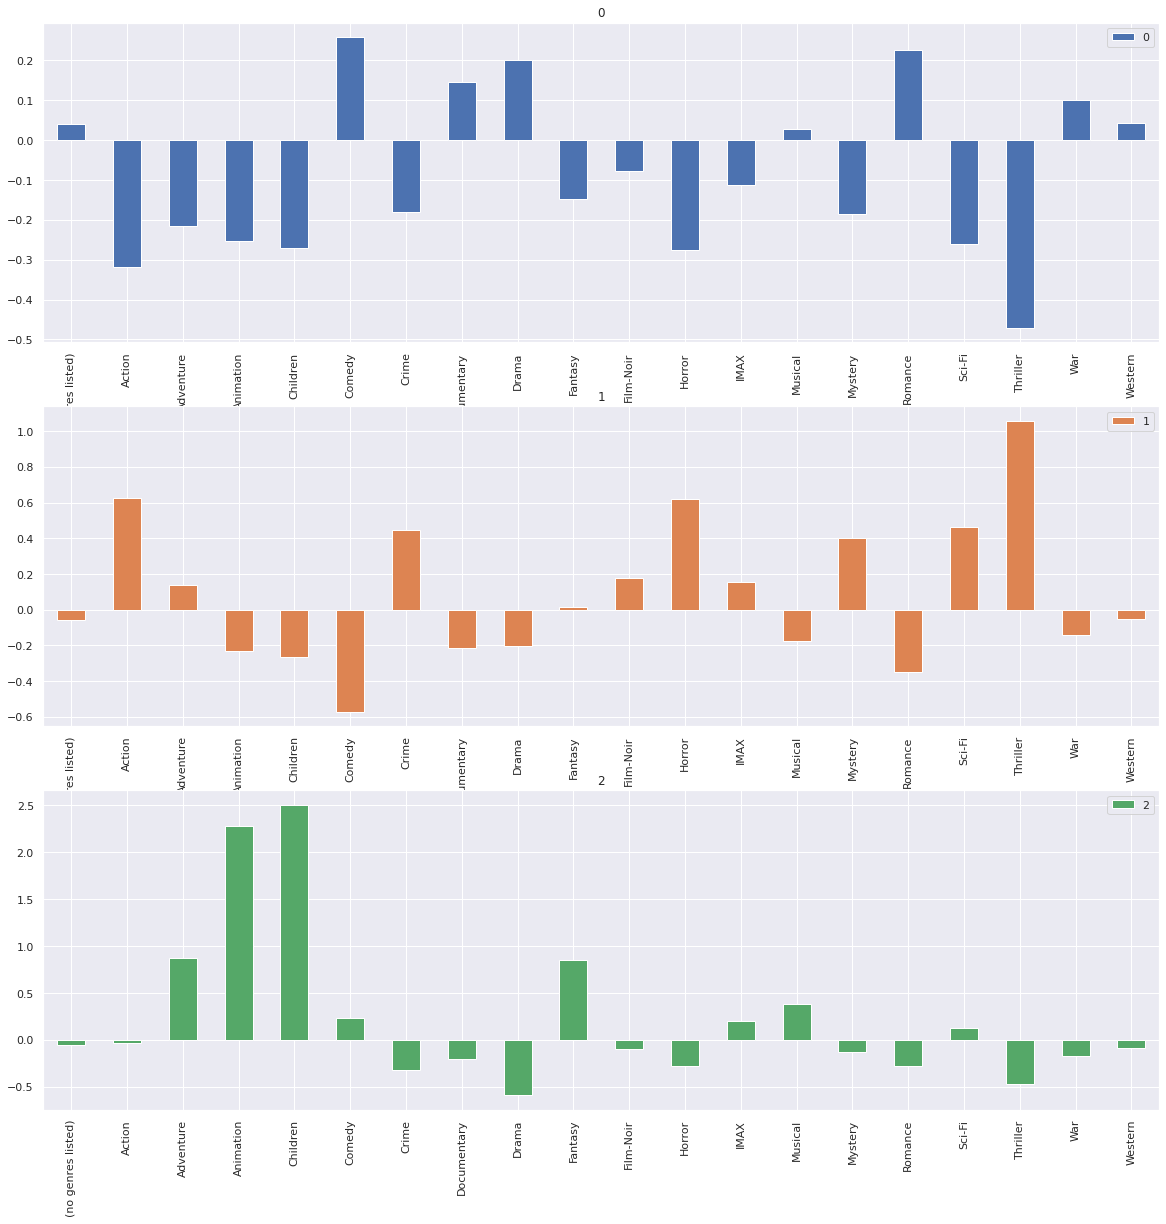

In [38]:
grupos.transpose().plot.bar(subplots=True,
                            figsize=(20,20),
                            sharex=False)

In [39]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_filmes[filtro].sample(10)

,filmesId,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2946,3950,Tigerland (2000),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2030,2702,Summer of Sam (1999),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3795,5308,Three Men and a Baby (1987),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
677,893,Mother Night (1996),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6271,47491,Adam's Apples (Adams æbler) (2005),Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4026,5693,Saturday Night Fever (1977),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4086,5839,My Father's Glory (La gloire de mon père) (1990),Adventure|Drama,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
535,632,Land and Freedom (Tierra y libertad) (1995),Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5722,27866,In My Father's Den (2004),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8592,117533,Citizenfour (2014),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.manifold import TSNE
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_Escalados)

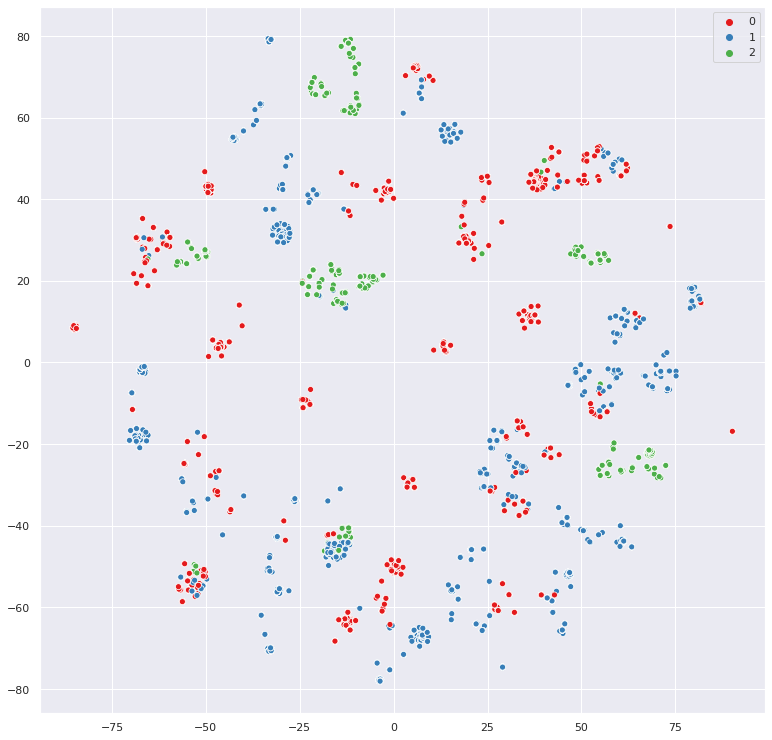

In [41]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

#Descobrindo o melhor numero de grupos

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f30ff3d7f98>,
      dtype=object)

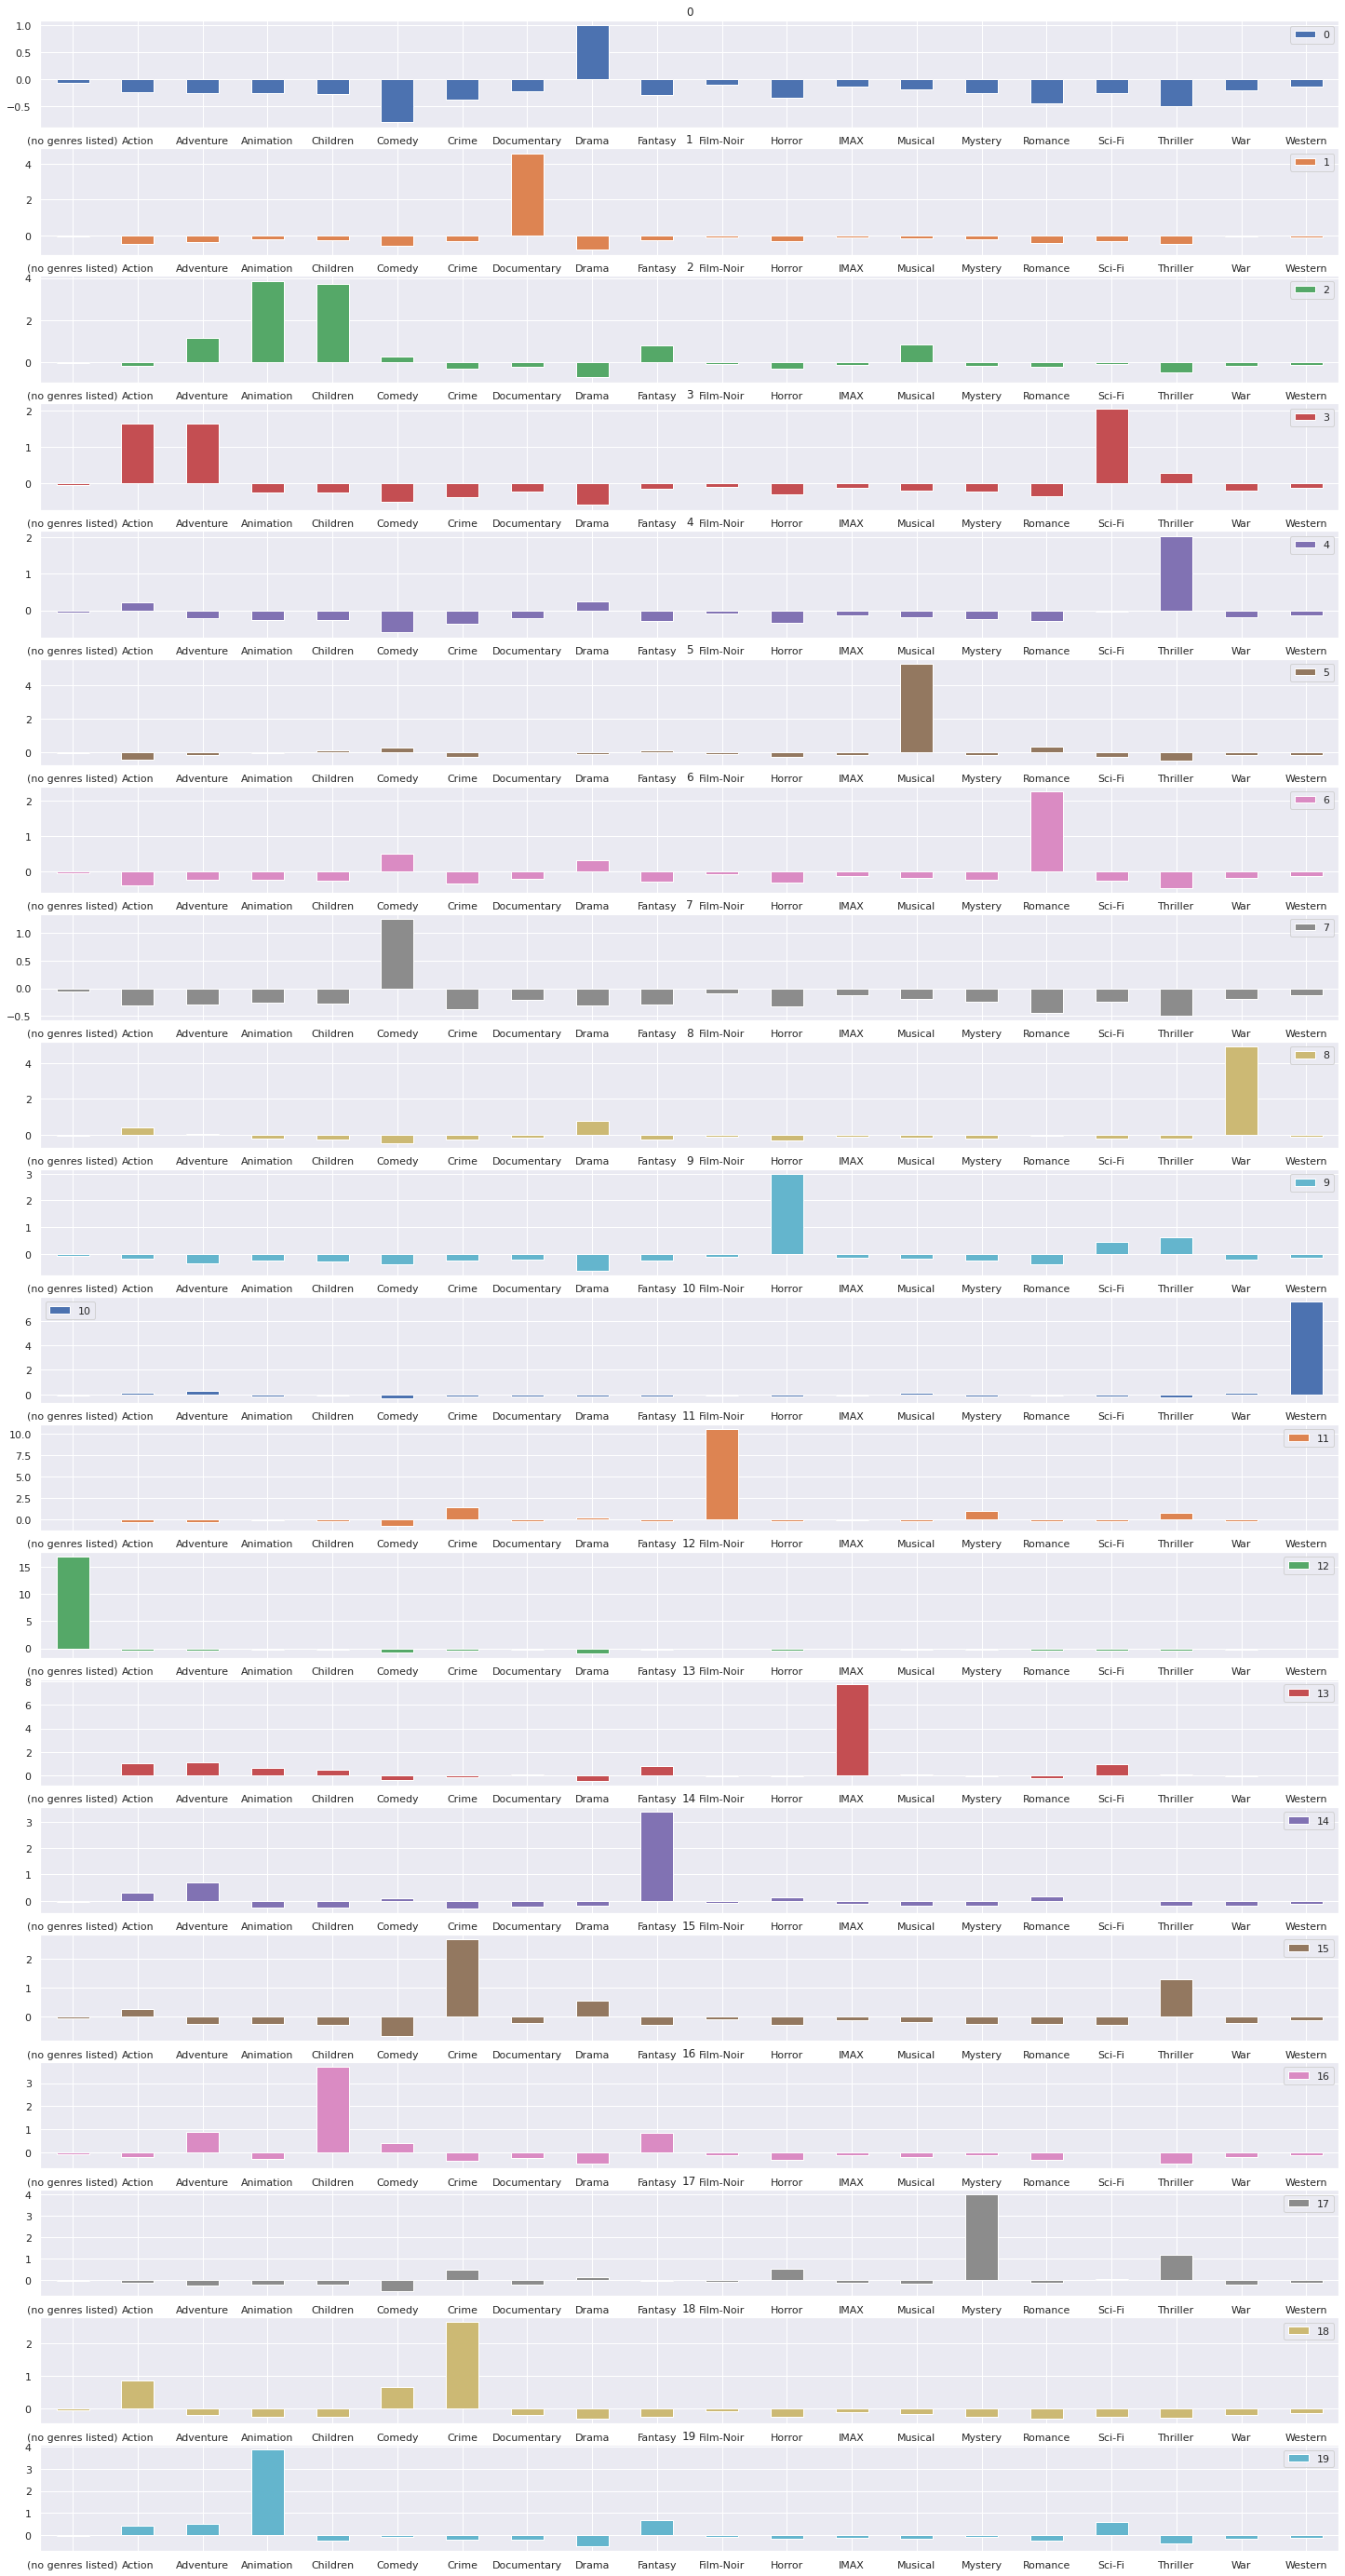

In [42]:
modelo = KM(n_clusters=20)
modelo.fit(generos_Escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)



In [43]:
grupo = 11

filtro = modelo.labels_ == grupo

dados_filmes[filtro].sample(10)

,filmesId,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2768,3706,Angel Heart (1987),Film-Noir|Horror|Mystery|Thriller,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0
4294,6273,In a Lonely Place (1950),Drama|Film-Noir|Mystery|Romance,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0
3273,4432,Sweet Smell of Success (1957),Drama|Film-Noir,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
704,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
5244,8600,Angels with Dirty Faces (1938),Crime|Drama|Film-Noir|Thriller,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
6176,44761,Brick (2005),Crime|Drama|Film-Noir|Mystery,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
5067,7943,"Killers, The (1946)",Crime|Film-Noir,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
6182,44849,Renaissance (2006),Action|Animation|Film-Noir|Sci-Fi|Thriller,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
711,930,Notorious (1946),Film-Noir|Romance|Thriller,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
6275,47566,Born to Kill (1947),Crime|Drama|Film-Noir,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0


In [0]:
def kmeans(numero_de_clusters, generos):
  modelo = KM(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [0]:
resultado = [kmeans(numero_de_grupos, generos_Escalados) for numero_de_grupos in range(1, 41)]

In [0]:
resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])

In [47]:
resultado

,grupos,inertia
0,1,194840.000000
1,2,179665.644539
2,3,168062.318764
3,4,157222.084443
4,5,147272.985142
5,6,138516.718225
6,7,130225.577195
7,8,119335.989960
8,9,111640.289760
9,10,104396.516705


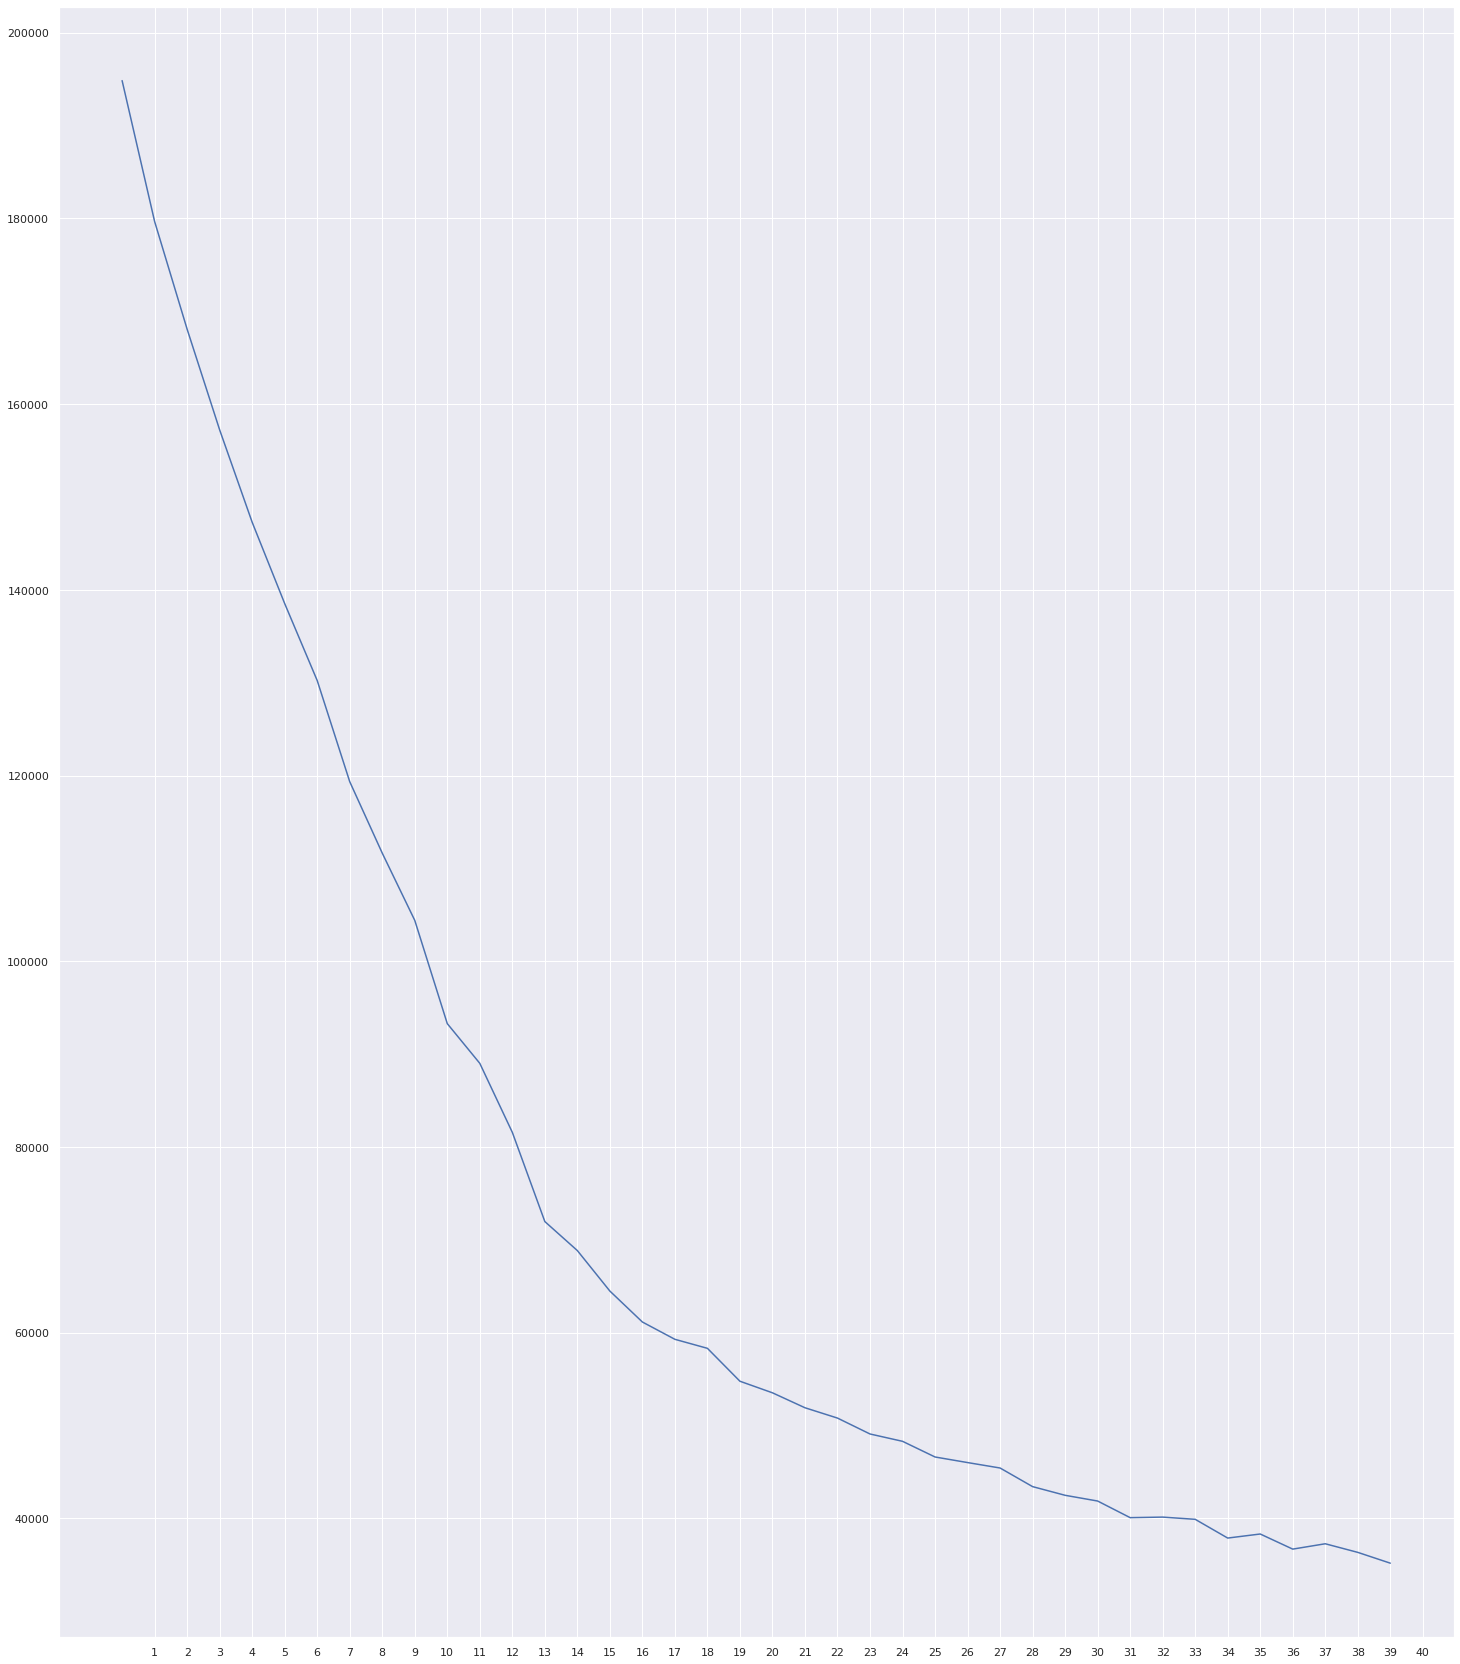

In [48]:
resultado.inertia.plot(xticks=resultado.grupos,figsize=(25, 30))

***Usamos o elbow method para achar o ponto certo da curva que indica o número de clusters elbow point=18.***
*obs: ponto pode variar de acordo com a quantidade de vezes q rodamos
![imagem do elbow point------- 
    https://drive.google.com/open?id=17vD6zrni8fS8cTyMqj5GzKgv1rm1B_5c](https://drive.google.com/open?id=17vD6zrni8fS8cTyMqj5GzKgv1rm1B_5c)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f30fc4d3860>,
      dtype=object)

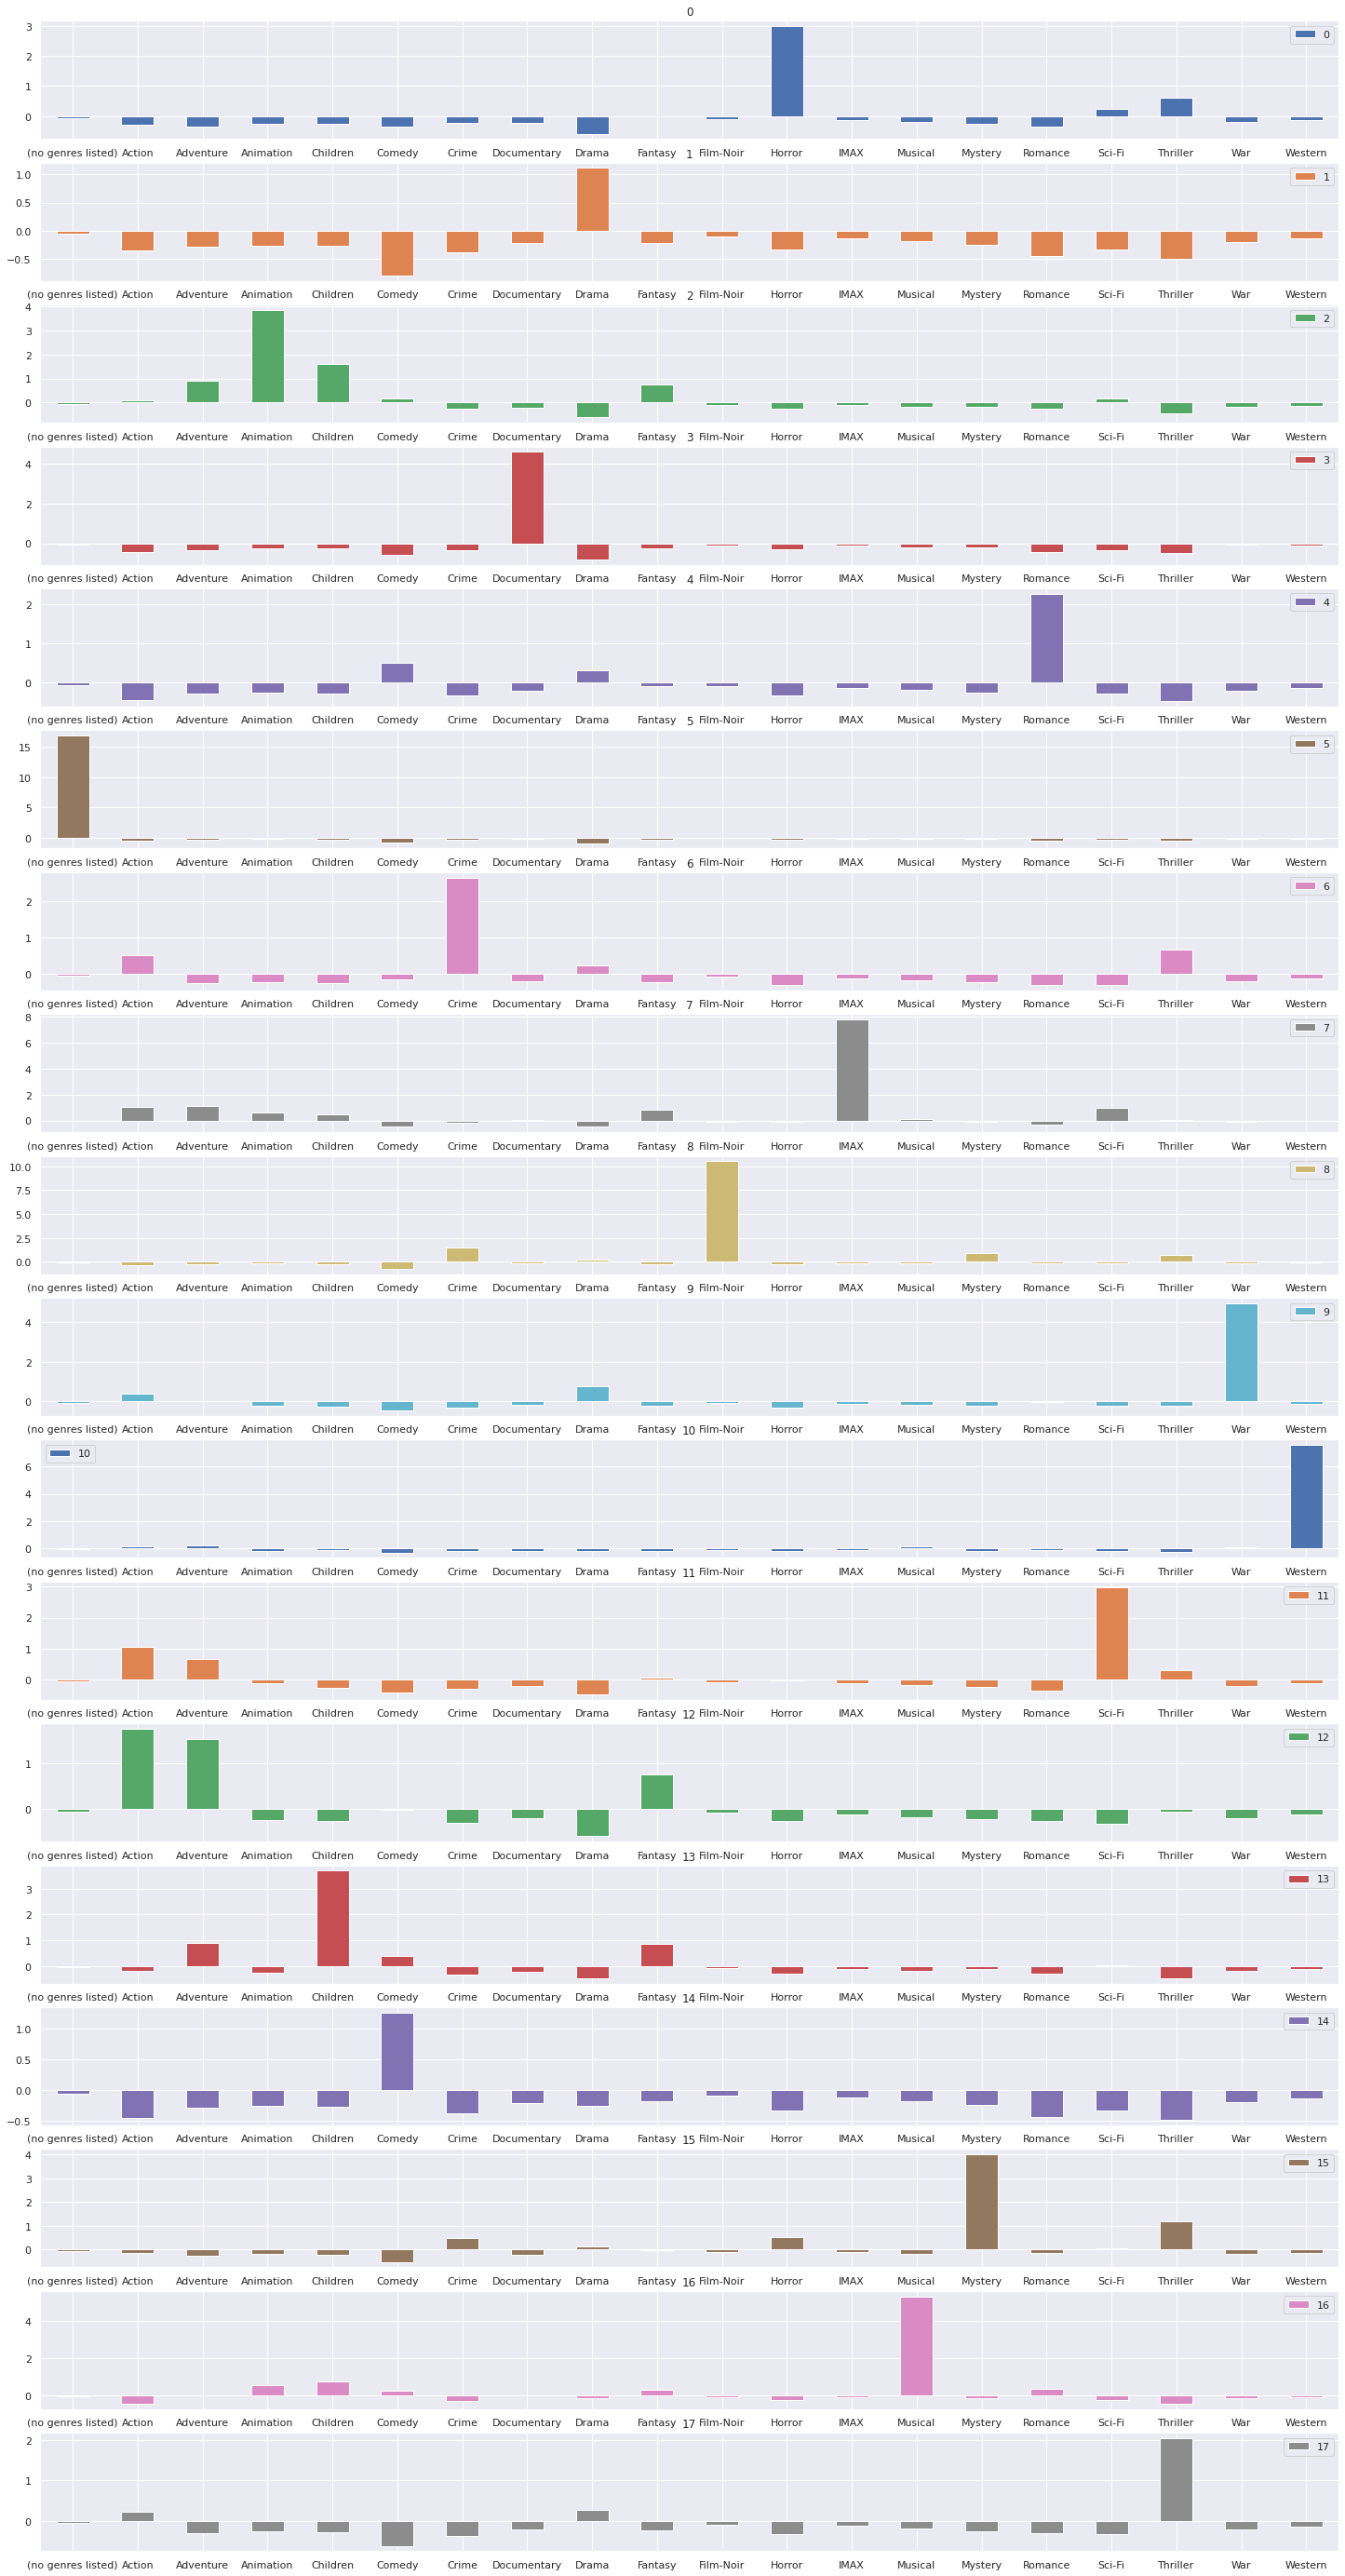

In [63]:
modelo = KM(n_clusters=18)
modelo.fit(generos_Escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [64]:
grupo = 4

filtro = modelo.labels_ == grupo

dados_filmes[filtro].sample(10)

,filmesId,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2556,3422,She's Gotta Have It (1986),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1652,2205,Mr. & Mrs. Smith (1941),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1310,1757,Fallen Angels (Duo luo tian shi) (1995),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
361,417,Barcelona (1994),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2124,2822,Medicine Man (1992),Adventure|Romance,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6219,45672,Click (2006),Adventure|Comedy|Drama|Fantasy|Romance,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0
3787,5296,"Sweetest Thing, The (2002)",Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7470,81949,"Romantics, The (2010)",Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
9404,164909,La La Land (2016),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5323,8838,Alice Doesn't Live Here Anymore (1974),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


#**Agrupamento Hierárquico**

##AgglomerativeClustering

In [0]:
from sklearn.cluster import AgglomerativeClustering
modelo = AgglomerativeClustering(n_clusters=18)
grupos = modelo.fit_predict(generos_Escalados)

In [0]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_Escalados)

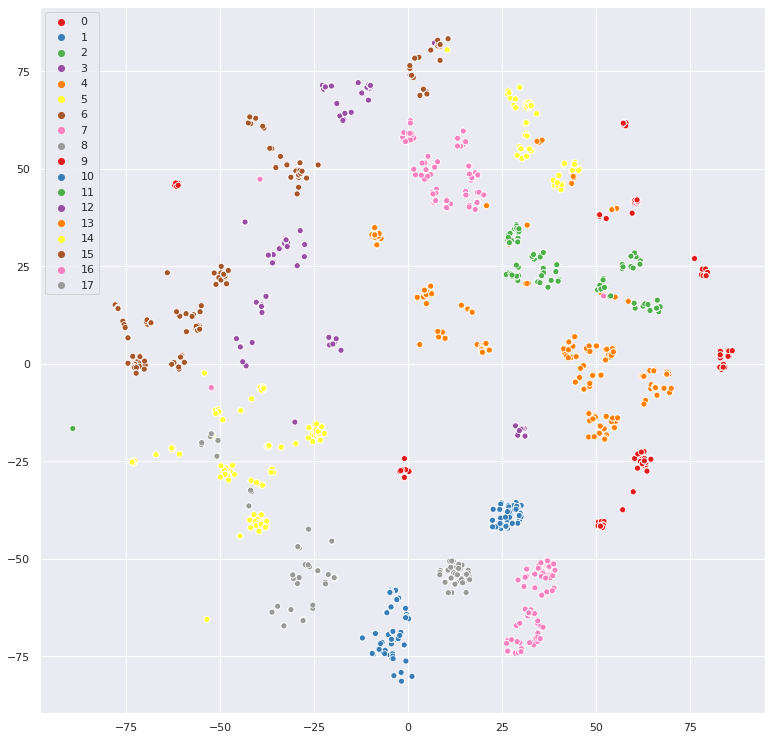

In [67]:
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos,
               palette=sns.color_palette('Set1', 18))

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f30fb783400>,
      dtype=object)

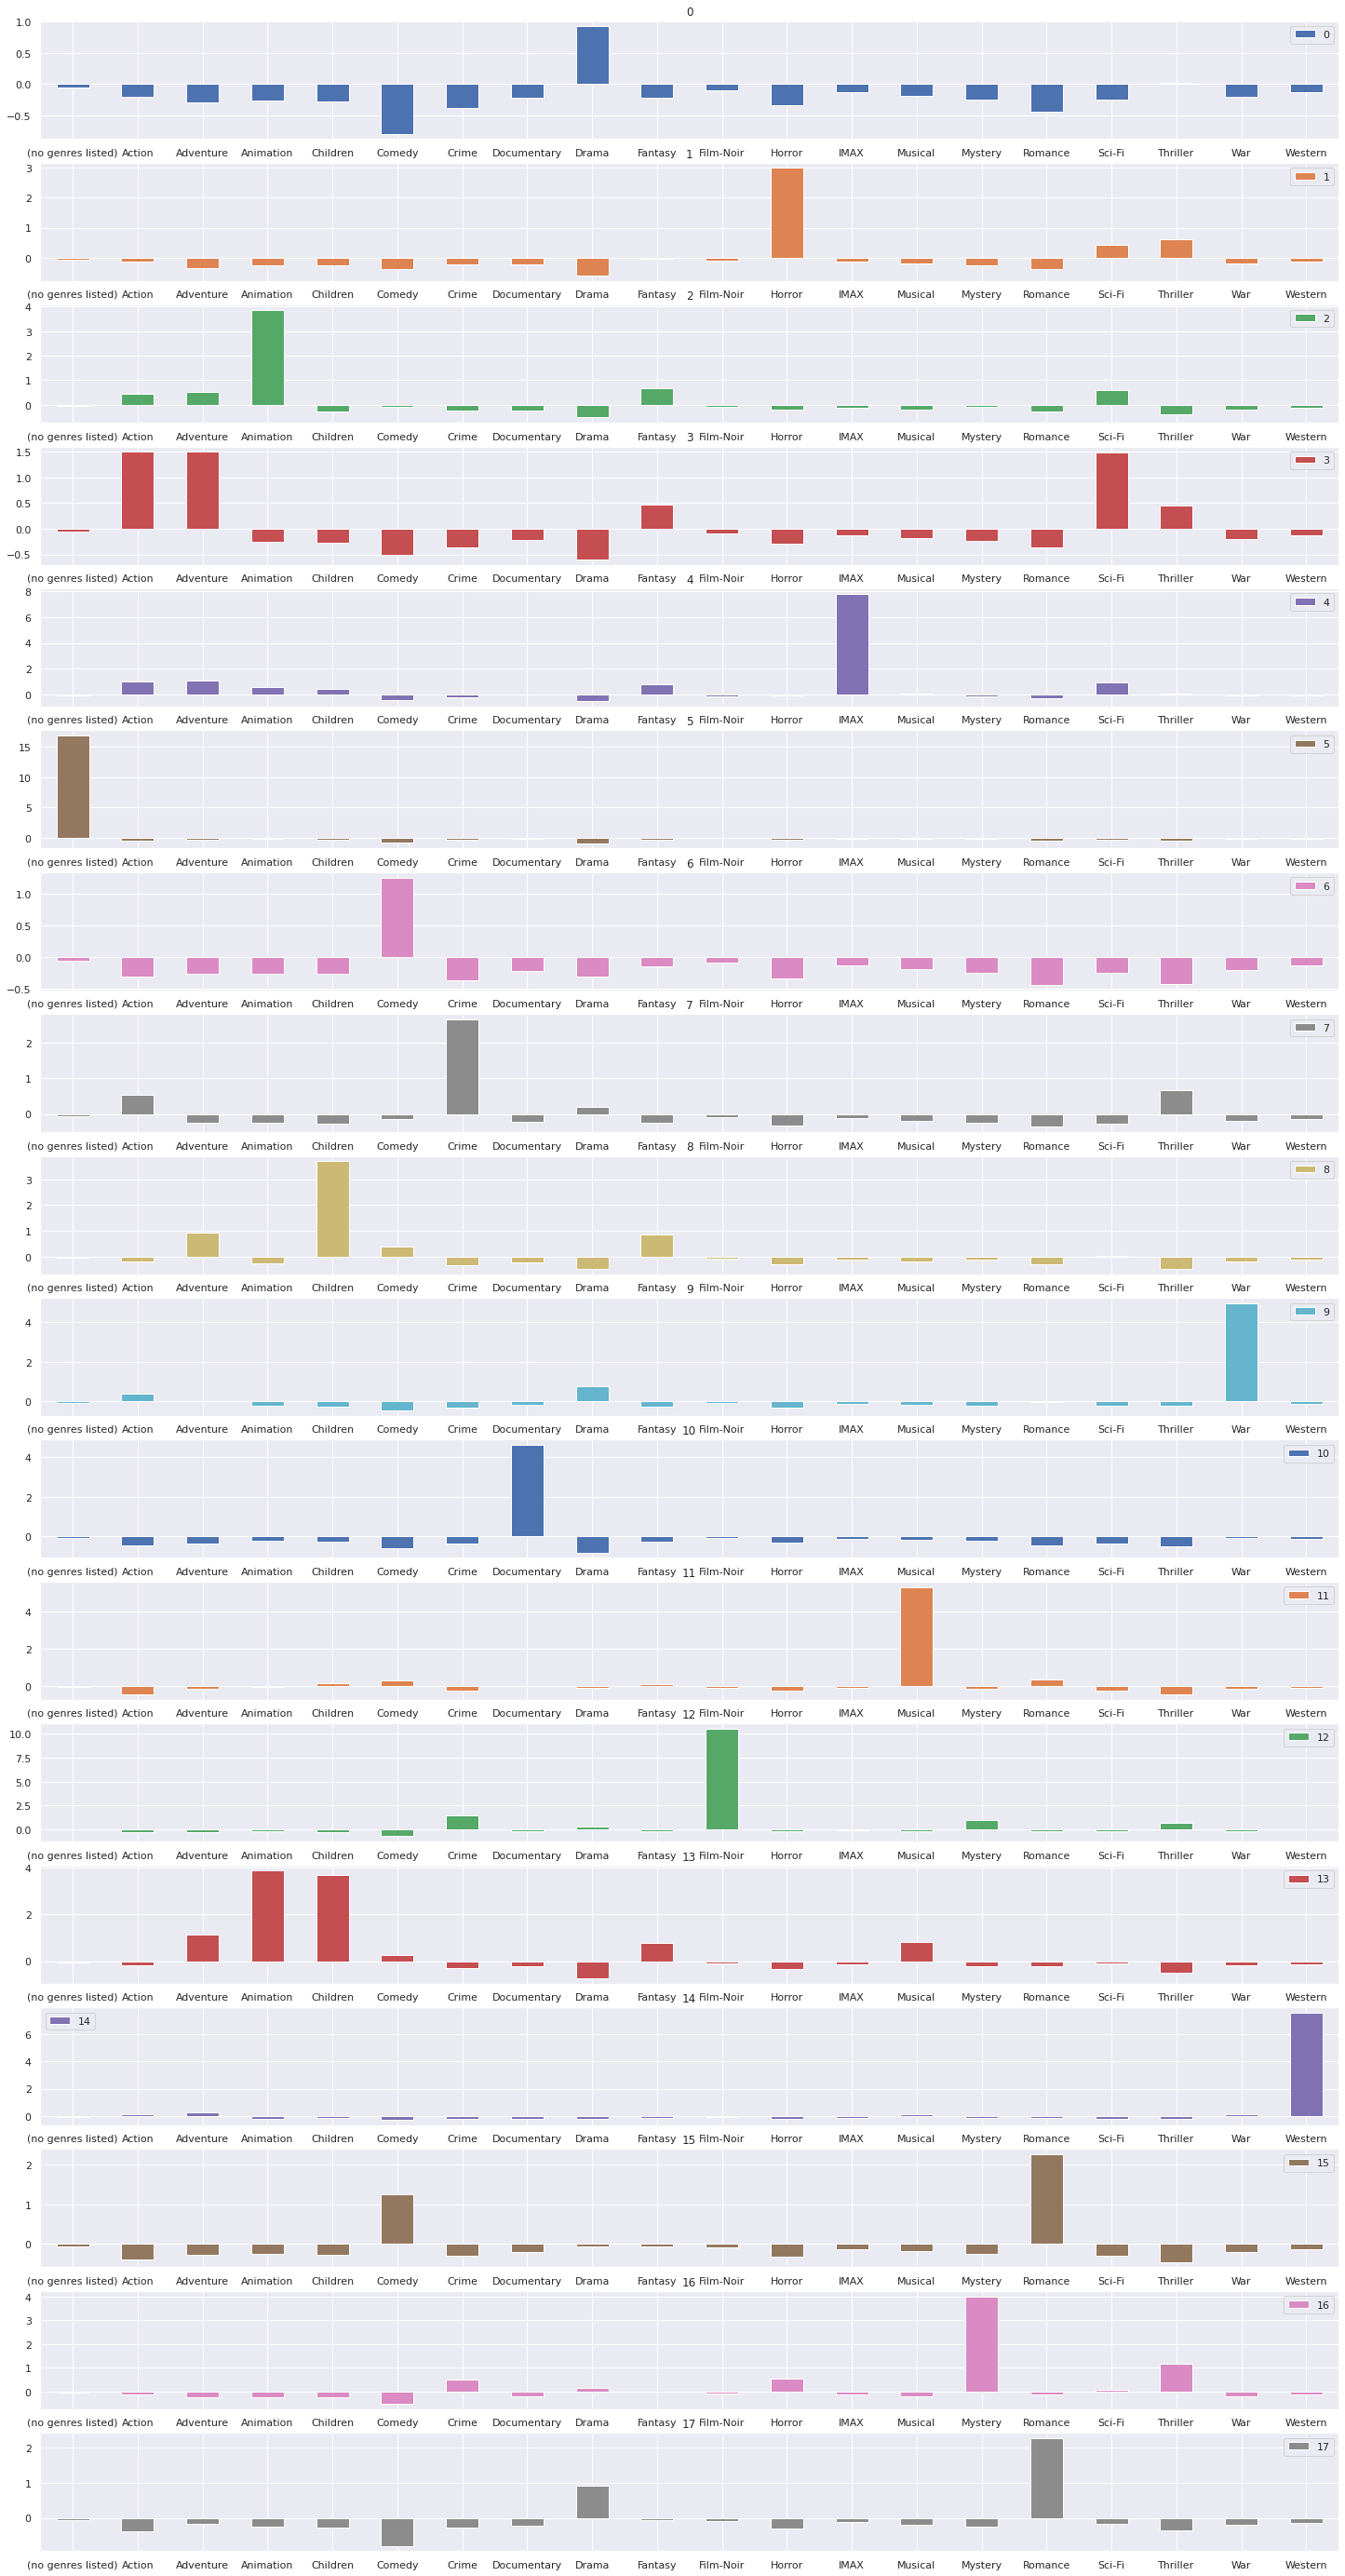

In [69]:
modelo = KM(n_clusters=18)
modelo.fit(generos_Escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

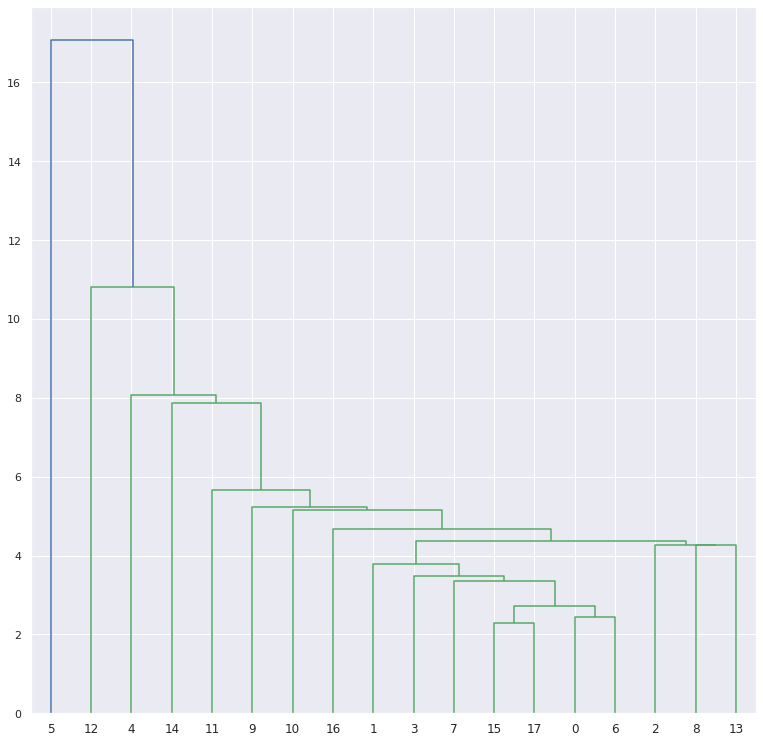

In [70]:
matriz_de_distancia = linkage(grupos)

dendrograma = dendrogram(matriz_de_distancia)